In [41]:
import numpy as np
import Hubb as Hb
import matplotlib.pyplot as plt
m = 5
sum1 = -1*np.sqrt(1)
dimens = m*m
B = np.eye(dimens)
H = np.zeros((dimens,dimens),dtype = np.complex128)
str = []

c:\eSupport\ANACONDA\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


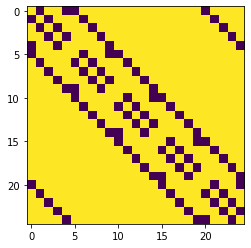

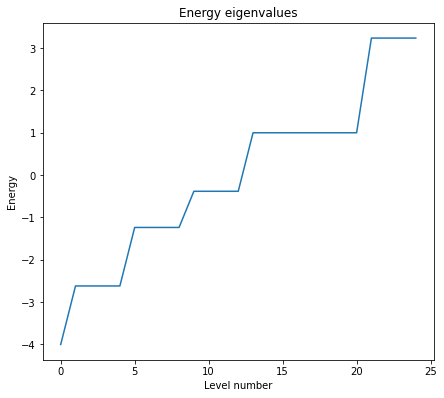

In [42]:
d = Hb.Hubbard(m)
for s in range(dimens):
        str = B[s]
        start = list(str)
        index = start.index(1)
        for i in range(m):
            for j in range(m):
                if start[0] == 1:
                    particle = [i,j]
                start.remove(start[0])
       
        y = d.neighbours(particle)
        str1 = []
        str2 = []
        str3 = []
        str4 = []
        for i in range(len(y)):
            setka = np.zeros((m,m))
            setka[y[i][0]][y[i][1]] = 1
            for k in range(len(setka)):
                for j in range(len(setka)):
                    if i == 1:
                        str1.append(setka[k][j])
                    elif i == 2:
                        str2.append(setka[k][j])
                    elif i == 3:
                        str3.append(setka[k][j])
                    else:
                        str4.append(setka[k][j])
                        
        index1 = str1.index(1)
        index2 = str2.index(1)
        index3 = str3.index(1)
        index4 = str4.index(1)
               
        H[index][index1] = sum1
        H[index][index2] = sum1
        H[index][index3] = sum1
        H[index][index4] = sum1
#print(H)
plt.imshow(H.real, cmap = "viridis")

E,C = np.linalg.eig(H)
fig,ax = plt.subplots(figsize = (7,6.2))
ax.set_title("Energy eigenvalues")
ax.set_ylabel('Energy')
ax.set_xlabel('Level number')
plt.plot(sorted(E))


c:\eSupport\ANACONDA\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


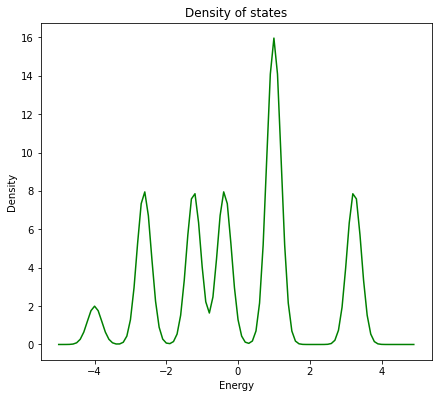

In [43]:
omega = np.arange(-5,5,1e-1)
R = []
for i in range(100):
    R.append(0)
sigma = 2e-1
data_D = []
for j in range(100):
    for i in range(len(E)):
        R[j] += + np.exp(-(omega[j]-E[i])**2/(2*sigma**2))/np.sqrt(2*3.14*sigma**2)
    data_D.append(R[j])
fig1,ax1 = plt.subplots(figsize = (7,6.2))
ax1.set_title("Density of states")
ax1.set_ylabel('Density')
ax1.set_xlabel('Energy')

plt.plot(omega,data_D,'green')

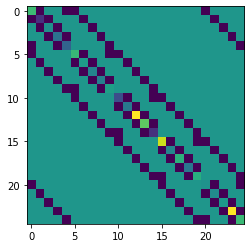

In [44]:
#chemical potential with impurities
# At first, i made element-by-element summation but it is noneffective
V = np.random.random_sample(dimens)
mu = -1 + np.random.random_sample(dimens)
delta = np.random.random_sample(dimens)*np.eye(dimens)
H += (V + mu)* np.eye(dimens)
plt.imshow(H.real, cmap = "viridis")

In [45]:
# формирование матрицы 
O1 = np.hstack([H,delta])
O2 = np.hstack([delta,-H])
O = np.vstack([O1,O2])